In [3]:
#Which is the most powerful Pokemon?
#I have no clue so finding the right dataset with all generations was important.  

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [5]:
#Data Loading

df = pd.read_csv('pokemon.csv')
df

,Unnamed: 0,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.00,1.00,1.0,1.0,1.0,1.0,0.5
1,1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.00,1.00,1.0,1.0,1.0,1.0,0.5
2,2,3,Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.00,1.00,1.0,1.0,1.0,1.0,0.5
3,3,3,Mega Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.00,1.00,1.0,1.0,1.0,1.0,0.5
4,4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,Normal,Lizard Pokémon,1,Fire,...,2.0,1.0,1.0,0.50,2.00,1.0,1.0,1.0,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,1023,888,Zacian Hero of Many Battles,NaN,NaN,8,Legendary,Warrior Pokémon,1,Fairy,...,1.0,1.0,1.0,0.50,1.00,1.0,0.0,0.5,2.0,1.0
1024,1024,889,Zamazenta Crowned Shield,NaN,NaN,8,Legendary,Warrior Pokémon,2,Fighting,...,2.0,1.0,1.0,0.25,0.25,1.0,0.5,0.5,0.5,1.0
1025,1025,889,Zamazenta Hero of Many Battles,NaN,NaN,8,Legendary,Warrior Pokémon,1,Fighting,...,1.0,2.0,2.0,0.50,0.50,1.0,1.0,0.5,1.0,2.0
1026,1026,890,Eternatus,NaN,NaN,8,Legendary,Gigantic Pokémon,2,Poison,...,2.0,1.0,2.0,0.50,1.00,1.0,2.0,1.0,1.0,1.0


In [6]:
#This data set includes 1028 Pokemons from 8 generations including their number, name, first and second type, and basic stats: 
#HP, Attack, Defense, Special Attack, Special Defense, and Speed.

df.shape

(1028, 51)

In [7]:
#Reviewed column types.  
#int64 - whole numbers
#float and numberic - decimal values

df.dtypes

Unnamed: 0            int64
pokedex_number        int64
name                 object
german_name          object
japanese_name        object
generation            int64
status               object
species              object
type_number           int64
type_1               object
type_2               object
height_m            float64
weight_kg           float64
abilities_number      int64
ability_1            object
ability_2            object
ability_hidden       object
total_points          int64
hp                    int64
attack                int64
defense               int64
sp_attack             int64
sp_defense            int64
speed                 int64
catch_rate          float64
base_friendship     float64
base_experience     float64
growth_rate          object
egg_type_number       int64
egg_type_1           object
egg_type_2           object
percentage_male     float64
egg_cycles          float64
against_normal      float64
against_fire        float64
against_water       

In [8]:
#Data Exploration

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 51 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1028 non-null   int64  
 1   pokedex_number    1028 non-null   int64  
 2   name              1028 non-null   object 
 3   german_name       938 non-null    object 
 4   japanese_name     938 non-null    object 
 5   generation        1028 non-null   int64  
 6   status            1028 non-null   object 
 7   species           1028 non-null   object 
 8   type_number       1028 non-null   int64  
 9   type_1            1028 non-null   object 
 10  type_2            542 non-null    object 
 11  height_m          1028 non-null   float64
 12  weight_kg         1027 non-null   float64
 13  abilities_number  1028 non-null   int64  
 14  ability_1         1025 non-null   object 
 15  ability_2         513 non-null    object 
 16  ability_hidden    810 non-null    object 


In [9]:
#Checking if some Pokemons have missing data. 

df.isnull().sum()

Unnamed: 0            0
pokedex_number        0
name                  0
german_name          90
japanese_name        90
generation            0
status                0
species               0
type_number           0
type_1                0
type_2              486
height_m              0
weight_kg             1
abilities_number      0
ability_1             3
ability_2           515
ability_hidden      218
total_points          0
hp                    0
attack                0
defense               0
sp_attack             0
sp_defense            0
speed                 0
catch_rate          104
base_friendship     104
base_experience     104
growth_rate           1
egg_type_number       0
egg_type_1            3
egg_type_2          746
percentage_male     236
egg_cycles            1
against_normal        0
against_fire          0
against_water         0
against_electric      0
against_grass         0
against_ice           0
against_fight         0
against_poison        0
against_ground  

In [10]:
#Data Clean up

df.fillna(value = 'None', inplace=True)

In [11]:
# verify no null values

df.isnull().sum()

Unnamed: 0          0
pokedex_number      0
name                0
german_name         0
japanese_name       0
generation          0
status              0
species             0
type_number         0
type_1              0
type_2              0
height_m            0
weight_kg           0
abilities_number    0
ability_1           0
ability_2           0
ability_hidden      0
total_points        0
hp                  0
attack              0
defense             0
sp_attack           0
sp_defense          0
speed               0
catch_rate          0
base_friendship     0
base_experience     0
growth_rate         0
egg_type_number     0
egg_type_1          0
egg_type_2          0
percentage_male     0
egg_cycles          0
against_normal      0
against_fire        0
against_water       0
against_electric    0
against_grass       0
against_ice         0
against_fight       0
against_poison      0
against_ground      0
against_flying      0
against_psychic     0
against_bug         0
against_ro

In [12]:
for column in df:
    if df[column].dtypes=='object':
        print(f'{column} : {df[column].unique()}')

name : ['Bulbasaur' 'Ivysaur' 'Venusaur' ... 'Zamazenta Hero of Many Battles'
 'Eternatus' 'Eternatus Eternamax']
german_name : ['Bisasam' 'Bisaknosp' 'Bisaflor' 'Glumanda' 'Glutexo' 'Glurak' 'Schiggy'
 'Schillok' 'Turtok' 'Raupy' 'Safcon' 'Smettbo' 'Hornliu' 'Kokuna' 'Bibor'
 'Taubsi' 'Tauboga' 'Tauboss' 'Rattfratz' 'Rattikarl' 'Habitak' 'Ibitak'
 'Rettan' 'Arbok' 'Pikachu' 'Raichu' 'Sandan' 'Sandamer' 'Nidoran♀'
 'Nidorina' 'Nidoqueen' 'Nidoran♂' 'Nidorino' 'Nidoking' 'Piepi' 'Pixi'
 'Vulpix' 'Vulnona' 'Pummeluff' 'Knuddeluff' 'Zubat' 'Golbat' 'Myrapla'
 'Duflor' 'Giflor' 'Paras' 'Parasek' 'Bluzuk' 'Omot' 'Digda' 'Digdri'
 'Mauzi' 'Snobilikat' 'Enton' 'Entoron' 'Menki' 'Rasaff' 'Fukano' 'Arkani'
 'Quapsel' 'Quaputzi' 'Quappo' 'Abra' 'Kadabra' 'Simsala' 'Machollo'
 'Maschock' 'Machomei' 'Knofensa' 'Ultrigaria' 'Sarzenia' 'Tentacha'
 'Tentoxa' 'Kleinstein' 'Georok' 'Geowaz' 'Ponita' 'Gallopa' 'Flegmon'
 'Lahmus' 'Magnetilo' 'Magneton' 'Porenta' 'Dodu' 'Dodri' 'Jurob' 'Jugong'
 'Sleima'

In [13]:
#For vanity's sake I wanted to more about Pikachu, the only Pokemon I know.  What makes it "legendary"?

print(df.loc[df['name'] == 'Pikachu'])

    Unnamed: 0  pokedex_number     name german_name    japanese_name  \
32          32              25  Pikachu     Pikachu  ピカチュウ (Pikachu)   

    generation  status        species  type_number    type_1  ...  \
32           1  Normal  Mouse Pokémon            1  Electric  ...   

   against_ground  against_flying against_psychic  against_bug against_rock  \
32            2.0             0.5             1.0          1.0          1.0   

   against_ghost against_dragon  against_dark  against_steel  against_fairy  
32           1.0            1.0           1.0            0.5            1.0  

[1 rows x 51 columns]


In [14]:
#Pikachu status is normal. Wait, Pikachu is NOT legendary!?!     

In [15]:
#This led to the next question.  What are the different types of Pokemon?

print('Number of Pokemon of Each Status')
print(df.groupby('status').agg('count')['name'])


Number of Pokemon of Each Status
status
Legendary         39
Mythical          29
Normal           915
Sub Legendary     45
Name: name, dtype: int64


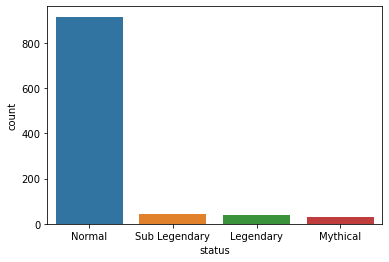

In [16]:
sns.countplot(df['status'])

In [17]:
#Legendary Pokemon are extremely rare and powerful.  Sub-legendary and Mythical are sub-sets of Legendary.  

In [18]:
#Which is the most powerful Pokemon?  There is no column that clearly shows "strength" or "power".  
#So, to simplify this quest we defined strength as follows: 
#Power = HP + Attack + Defense + Special Attack + Special Defense + Speed

In [19]:
df[['name','total_points','hp','attack','defense','sp_attack','sp_defense','speed']]

,name,total_points,hp,attack,defense,sp_attack,sp_defense,speed
0,Bulbasaur,318,45,49,49,65,65,45
1,Ivysaur,405,60,62,63,80,80,60
2,Venusaur,525,80,82,83,100,100,80
3,Mega Venusaur,625,80,100,123,122,120,80
4,Charmander,309,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...
1023,Zacian Hero of Many Battles,670,92,130,115,80,115,138
1024,Zamazenta Crowned Shield,720,92,130,145,80,145,128
1025,Zamazenta Hero of Many Battles,670,92,130,115,80,115,138
1026,Eternatus,690,140,85,95,145,95,130


In [19]:
#But first, back to my beloved Pikachu.  How does he fare with all of these Pokemon?

In [20]:
print(df.loc[df['name'] == 'Pikachu'])

    Unnamed: 0  pokedex_number     name german_name    japanese_name  \
32          32              25  Pikachu     Pikachu  ピカチュウ (Pikachu)   

    generation  status        species  type_number    type_1  ...  \
32           1  Normal  Mouse Pokémon            1  Electric  ...   

   against_ground  against_flying against_psychic  against_bug against_rock  \
32            2.0             0.5             1.0          1.0          1.0   

   against_ghost against_dragon  against_dark  against_steel  against_fairy  
32           1.0            1.0           1.0            0.5            1.0  

[1 rows x 51 columns]


In [ ]:
#Max

df['total_points'].max()

In [ ]:
#Max

df['total_points'].min()

In [ ]:
#Apparently, Pikachu is one of the weakest Pokemon out there.  I still love Pikachu though.

In [ ]:
#There is no explicit criteria that defines what makes a Pokemon legendary.
#However, Pokemon types define special attributes which determine each strength and weakneses.   

df[['type_1','type_2']]

In [ ]:
#Does each Pokemon have both types?  
#I already know from the initial data exploration that only 542 out of 1028 have Type_2 values.

In [ ]:
#How many Pokemon in each type?

print(df.groupby('type_1').agg('count')['name'])

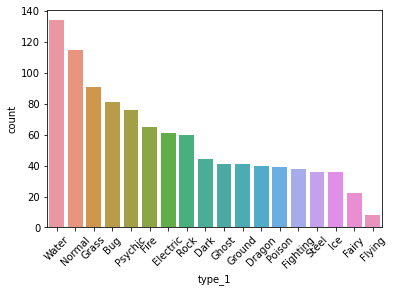

In [21]:
by_type_1 = sns.countplot(x='type_1', data=df, order = df['type_1'].value_counts().index)

for type_1 in by_type_1.get_xticklabels():
    type_1.set_rotation(45)

In [ ]:
#There are 18 Pokemon types.  
#According to this graph, most Pokemons are swimmers (Water type) than acrobats (Flying).  
#And interestingly, there are a few Fairy types too.  

In [22]:
#ANALYSIS ON STRENGTHS by Type

df[['type_1','total_points','hp','attack','defense','sp_attack','sp_defense','speed']]

,type_1,total_points,hp,attack,defense,sp_attack,sp_defense,speed
0,Grass,318,45,49,49,65,65,45
1,Grass,405,60,62,63,80,80,60
2,Grass,525,80,82,83,100,100,80
3,Grass,625,80,100,123,122,120,80
4,Fire,309,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...
1023,Fairy,670,92,130,115,80,115,138
1024,Fighting,720,92,130,145,80,145,128
1025,Fighting,670,92,130,115,80,115,138
1026,Poison,690,140,85,95,145,95,130


In [23]:
#ANALYSIS ON STRENGTHS by Pokemon name

df[['name','total_points','hp','attack','defense','sp_attack','sp_defense','speed']]

,name,total_points,hp,attack,defense,sp_attack,sp_defense,speed
0,Bulbasaur,318,45,49,49,65,65,45
1,Ivysaur,405,60,62,63,80,80,60
2,Venusaur,525,80,82,83,100,100,80
3,Mega Venusaur,625,80,100,123,122,120,80
4,Charmander,309,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...
1023,Zacian Hero of Many Battles,670,92,130,115,80,115,138
1024,Zamazenta Crowned Shield,720,92,130,145,80,145,128
1025,Zamazenta Hero of Many Battles,670,92,130,115,80,115,138
1026,Eternatus,690,140,85,95,145,95,130


In [62]:
#Aggregating Stats by Types

strongest_pokemon = df.groupby('type_1').agg('median')[['total_points','hp','attack','defense','sp_attack','sp_defense','speed']]
print(strongest_pokemon)

          total_points    hp  attack  defense  sp_attack  sp_defense  speed
type_1                                                                     
Bug              395.0  60.0    65.0     60.0       53.0        60.0   60.0
Dark             435.0  65.0    85.0     60.0       62.5        63.0   70.5
Dragon           600.0  78.5   100.0     90.0       87.0        90.0   87.5
Electric         481.0  60.0    75.0     67.0       91.0        73.0   90.0
Fairy            456.0  74.0    56.0     70.0       80.0        89.5   50.5
Fighting         460.0  70.0   102.5     75.0       52.5        64.0   64.0
Fire             476.0  70.0    84.0     65.0       81.0        70.0   73.0
Flying           485.0  74.5    77.5     62.5       69.0        80.0   81.0
Ghost            476.0  60.0    66.0     75.0       74.0        75.0   56.0
Grass            425.0  66.0    70.0     70.0       74.0        70.0   57.0
Ground           430.0  70.0    95.0     85.0       50.0        65.0   55.0
Ice         

In [24]:
#Aggregating Stats by Name

strongest_pokemon = df.groupby('name').agg('median')[['total_points','hp','attack','defense','sp_attack','sp_defense','speed']]
print(strongest_pokemon)

                        total_points   hp  attack  defense  sp_attack  \
name                                                                    
Abomasnow                        494   90      92       75         92   
Abra                             310   25      20       15        105   
Absol                            465   65     130       60         75   
Accelgor                         495   80      70       40        100   
Aegislash Blade Forme            520   60     150       50        150   
...                              ...  ...     ...      ...        ...   
Zubat                            245   40      45       35         30   
Zweilous                         420   72      85       70         65   
Zygarde 10% Forme                486   54     100       71         61   
Zygarde 50% Forme                600  108     100      121         81   
Zygarde Complete Forme           708  216     100      121         91   

                        sp_defense  speed  
name  

In [64]:
#Aggregated Type in descending order by points

strongest_pokemon.sort_values(by=['total_points'], inplace=True, ascending=False)
print(strongest_pokemon)

          total_points    hp  attack  defense  sp_attack  sp_defense  speed
type_1                                                                     
Dragon           600.0  78.5   100.0     90.0       87.0        90.0   87.5
Steel            500.0  66.0    90.0    115.0       57.5        71.0   50.0
Psychic          486.0  68.0    65.0     65.0       95.0        90.0   80.0
Flying           485.0  74.5    77.5     62.5       69.0        80.0   81.0
Electric         481.0  60.0    75.0     67.0       91.0        73.0   90.0
Rock             478.5  68.5    95.0     98.5       55.0        65.0   50.5
Fire             476.0  70.0    84.0     65.0       81.0        70.0   73.0
Ghost            476.0  60.0    66.0     75.0       74.0        75.0   56.0
Ice              462.5  70.5    70.0     70.0       67.5        65.0   65.0
Fighting         460.0  70.0   102.5     75.0       52.5        64.0   64.0
Water            457.0  70.0    72.0     70.0       70.0        69.0   65.0
Fairy       

In [27]:
#Aggregated Name in descending order by points

strongest_pokemon.sort_values(by=['total_points'], inplace=True, ascending=False)
print(strongest_pokemon)

                      total_points   hp  attack  defense  sp_attack  \
name                                                                  
Eternatus Eternamax           1125  255     115      250        125   
Mega Rayquaza                  780  105     180      100        180   
Mega Mewtwo Y                  780  106     150       70        194   
Mega Mewtwo X                  780  106     190      100        154   
Primal Kyogre                  770  100     150       90        180   
...                            ...  ...     ...      ...        ...   
Azurill                        190   50      20       40         20   
Snom                           185   30      25       35         45   
Sunkern                        180   30      30       30         30   
Blipbug                        180   25      20       20         25   
Wishiwashi Solo Form           175   45      20       20         25   

                      sp_defense  speed  
name                              

In [72]:
#VOILA!  Dragon is the strongest pokemon type with the highest overall stats.    
#Although, it has the highest hp and sp_defense.  It falls behind in attack, spl_attack, and speed.

#According to Pokemon fandom Dragon-type Pokémon are, quite simply, dragons.  
#They are one of only two types to be Super Effective against its own type.  The other one is Ghost. 